In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('complete.csv')

In [3]:
df.head()

,Date,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Latitude,Longitude,Death,Total Confirmed cases
0,2020-01-30,Kerala,1,0,0,10.8505,76.2711,0,1
1,2020-01-31,Kerala,1,0,0,10.8505,76.2711,0,1
2,2020-02-01,Kerala,2,0,0,10.8505,76.2711,0,2
3,2020-02-02,Kerala,3,0,0,10.8505,76.2711,0,3
4,2020-02-03,Kerala,3,0,0,10.8505,76.2711,0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Date                                        1365 non-null   object 
 1   Name of State / UT                          1365 non-null   object 
 2   Total Confirmed cases (Indian National)     1365 non-null   int64  
 3   Total Confirmed cases ( Foreign National )  1365 non-null   int64  
 4   Cured/Discharged/Migrated                   1365 non-null   int64  
 5   Latitude                                    1365 non-null   float64
 6   Longitude                                   1365 non-null   float64
 7   Death                                       1365 non-null   int64  
 8   Total Confirmed cases                       1365 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 96.1+ KB


In [29]:
df.groupby('Name of State / UT').sum()['Total Confirmed cases']

Name of State / UT
Andaman and Nicobar Islands               421
Andhra Pradesh                          13614
Arunachal Pradesh                          25
Assam                                     764
Bihar                                    2382
Chandigarh                                657
Chhattisgarh                              702
Delhi                                   36833
Goa                                       205
Gujarat                                 28607
Haryana                                  5353
Himachal Pradesh                          753
Jammu and Kashmir                        7086
Jharkhand                                 702
Karnataka                                8200
Kerala                                  11777
Ladakh                                    580
Madhya Pradesh                          23516
Maharashtra                             80703
Manipur                                    59
Meghalaya                                 132
Mizoram        

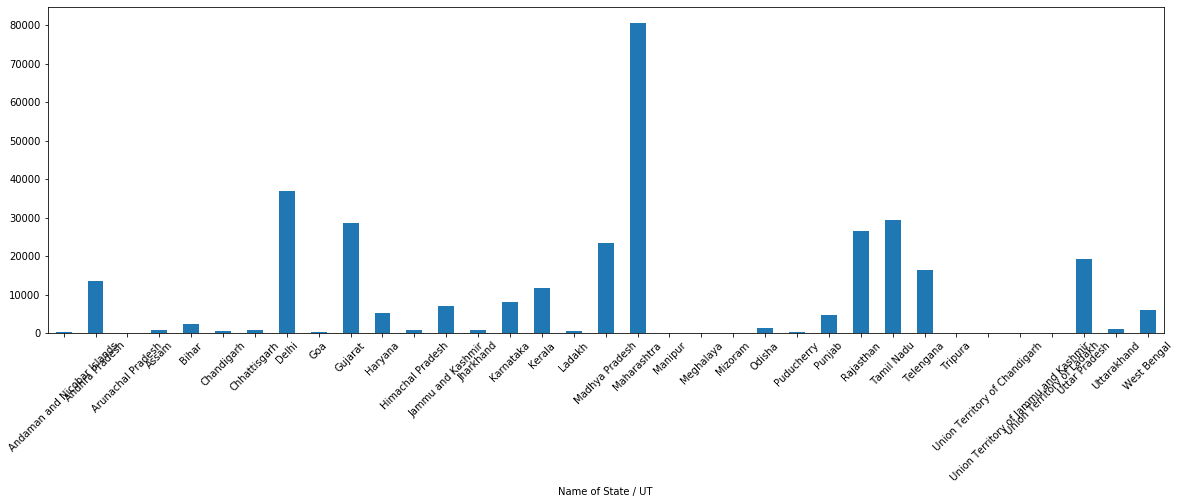

In [25]:
plt.figure(figsize=(20,6))
df.groupby('Name of State / UT').sum()['Total Confirmed cases'].plot(kind='bar')
plt.xticks(rotation=45);

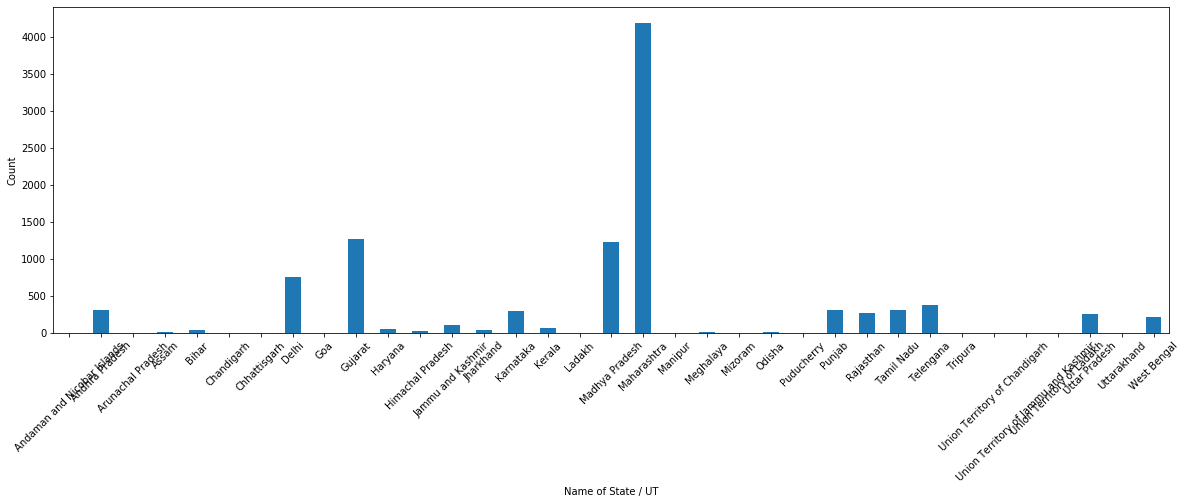

In [28]:
plt.figure(figsize=(20,6))
df.groupby('Name of State / UT').sum()['Death'].plot(kind='bar')
plt.ylabel('Count')
plt.xticks(rotation=45);

In [31]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [32]:
m=Prophet()

In [33]:
df_train=df[['Date','Total Confirmed cases']]

In [38]:
df_train.columns=['ds','y']

In [39]:
df_train.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [40]:
m.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))
/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [44]:
future = m.make_future_dataframe(periods=30)

In [45]:
forecast = m.predict(future)

/opt/anaconda3/lib/python3.7/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1))


In [47]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-67.239869,-845.756657,736.606913,-67.239869,-67.239869,-3.706228,-3.706228,-3.706228,-3.706228,-3.706228,-3.706228,0.0,0.0,0.0,-70.946096
1,2020-01-31,-65.571002,-825.097053,703.495839,-65.571002,-65.571002,-0.788760,-0.788760,-0.788760,-0.788760,-0.788760,-0.788760,0.0,0.0,0.0,-66.359762
2,2020-02-01,-63.902135,-839.878113,740.688190,-63.902135,-63.902135,0.611476,0.611476,0.611476,0.611476,0.611476,0.611476,0.0,0.0,0.0,-63.290659
3,2020-02-02,-62.233268,-870.207372,686.822784,-62.233268,-62.233268,1.618384,1.618384,1.618384,1.618384,1.618384,1.618384,0.0,0.0,0.0,-60.614884
4,2020-02-03,-60.564401,-892.454929,741.167729,-60.564401,-60.564401,8.831967,8.831967,8.831967,8.831967,8.831967,8.831967,0.0,0.0,0.0,-51.732434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,2020-05-23,1669.468132,928.243687,2467.202453,1577.336927,1758.449111,0.611476,0.611476,0.611476,0.611476,0.611476,0.611476,0.0,0.0,0.0,1670.079608
1391,2020-05-24,1703.445026,898.384268,2509.914497,1606.937556,1796.617388,1.618384,1.618384,1.618384,1.618384,1.618384,1.618384,0.0,0.0,0.0,1705.063410
1392,2020-05-25,1737.421921,954.411933,2473.034397,1637.627489,1835.568847,8.831967,8.831967,8.831967,8.831967,8.831967,8.831967,0.0,0.0,0.0,1746.253888
1393,2020-05-26,1771.398816,1004.393708,2523.416582,1665.690165,1875.098727,-3.711765,-3.711765,-3.711765,-3.711765,-3.711765,-3.711765,0.0,0.0,0.0,1767.687051


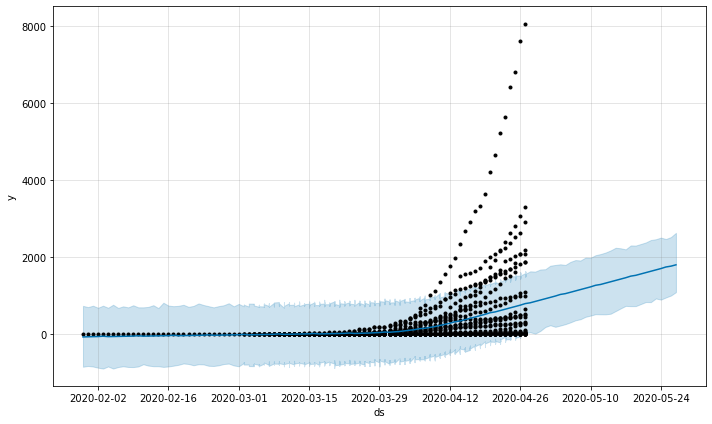

In [46]:
fig = m.plot(forecast)